In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url ='https://hypeauditor.com/top-youtube-sports-germany/'
page = requests.get(url)

soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
if page.status_code==200:
    soup=BeautifulSoup(page.text, 'html.parser')
    

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8" data-n-head="ssr"/>
  <meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/>
  <meta content="HypeAuditor.com" data-n-head="ssr" property="og:site_name"/>
  <meta content="website" data-n-head="ssr" property="og:type"/>
  <meta content="https://hypeauditor.com/s/img/fb_share.png?1585074190.67" data-hid="og:image" data-n-head="ssr" property="og:image"/>
  <meta content="1200" data-hid="og:image:width" data-n-head="ssr" property="og:image:width"/>
  <meta content="628" data-hid="og:image:height" data-n-head="ssr" property="og:image:height"/>
  <meta content="709483869223213" data-n-head="ssr" property="fb:app_id"/>
  <meta content="summary_large_image" data-n-head="ssr" property="twitter:card"/>
  <meta content="@hypeauditor" data-n-head="ssr" property="twitter:creator"/>
  <meta content="sentry-environment=production
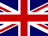
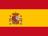

In [4]:
print(soup.prettify())

In [5]:
soup.find_all(class_="contributor__name-content")

[<div class="contributor__name-content" data-v-c5a99f5a="">freekickerz</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">Visca96Barca</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">SkySportDE</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">BVB</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">SPORTBILD</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">sportschau</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">Kick11De</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">jannik.freestyle</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">DerHansus</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">Cubanito_official</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">marvinvlogt</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">sportstudio</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">teamevil</

In [8]:
data_list = []
for i in range(1, 3):  
    for j in ['germany', 'austria', 'switzerland']:   
        url = f'https://hypeauditor.com/fr/top-youtube-sports-{j}/?p={i}'
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        
        contributors = soup.find_all('div', class_='contributor__name-content')
        followers = soup.find_all('div', class_='row-cell subscribers')
        countries = soup.find_all('div', class_='row-cell audience')
        avg_views = soup.find_all('div', class_='row-cell avg-views')
        avg_likes = soup.find_all('div', class_='row-cell avg-likes') 
        avg_comments = soup.find_all('div', class_='row-cell avg-comments')
    
        for contributor, follower, country, view, like, comment in zip(contributors, followers, countries, avg_views, avg_likes, avg_comments):
            name = contributor.text.strip()
            fl_num = follower.text.strip()
            country_name = country.text.strip()
            view_count = view.text.strip()
            like_count = like.text.strip()
            comment_count = comment.text.strip()
    
            print(name, fl_num, country_name, view_count, like_count, comment_count)
    
            data_list.append({
                'Contributor': name,
                'Followers': fl_num,
                'Country': country_name,
                'Average Views': view_count,
                'Average Likes': like_count,
                'Average Comments': comment_count,
            })
       


freekickerz 8.6M Allemagne 31K 1.9K 99
Visca96Barca 1.8M Allemagne 439K 26K 644
SkySportDE 1.6M Allemagne 128.1K 3.4K 36
BVB 1.2M Allemagne 21.1K 748 43
SPORTBILD 815.2K Allemagne 16.3K 132 31
sportschau 762.1K Allemagne 24.4K 402 15
Kick11De 707.5K Allemagne 109.2K 2.7K 211
jannik.freestyle 626.1K Allemagne 49.7K 2.7K 53
DerHansus 489.4K Allemagne 131.5K 7.1K 166
Cubanito_official 484.5K Allemagne 56.2K 1.1K 55
marvinvlogt 444.1K Allemagne 79.2K 2.5K 108
sportstudio 375.6K Allemagne 8.1K 182 3
teamevil 368.5K Allemagne 25.4K 869 75
LukasFootball 337.6K Allemagne 34.9K 1.1K 3
bayerleverkusen 321K Allemagne 30.8K 1.2K 22
benbeholz 305.1K Allemagne 5.5K 196 24
broski 273.1K Allemagne 258.6K 19.9K 459
ManuThiele 258.5K Allemagne 210.6K 7.2K 987
HomeofHandball 195.2K Allemagne 15.5K 198 6
BenMasterful 179.4K Allemagne 1.1K 60 12
NiklasNeo 167.4K Allemagne 102.3K 9.1K 71
RTLSport 159.1K Allemagne 5.5K 104 2
SPOX 155.5K Allemagne 4.9K 56 1
vitbikes 151.5K Allemagne 7.8K 248 19
KilianJonas 14

In [9]:
import pandas as pd
import os

In [10]:
df = pd.DataFrame(data_list)

In [11]:
df.columns = ['Name', 'Followers', 'Country', 'Average Views', 'Average Likes', 'Average Comments'] 

In [12]:
df

,Name,Followers,Country,Average Views,Average Likes,Average Comments
0,freekickerz,8.6M,Allemagne,31K,1.9K,99
1,Visca96Barca,1.8M,Allemagne,439K,26K,644
2,SkySportDE,1.6M,Allemagne,128.1K,3.4K,36
3,BVB,1.2M,Allemagne,21.1K,748,43
4,SPORTBILD,815.2K,Allemagne,16.3K,132,31
...,...,...,...,...,...,...
117,bisDanne,17.5K,Allemagne,5.9K,181,6
118,freestylebiking,17.4K,Allemagne,472.5,12,0
119,SPONTENT,17K,Allemagne,9.5K,318,13
120,DHBde,17K,Allemagne,973,21,0


In [13]:
csv_file = r'C:\Users\DELL\Desktop\OutZip\Bloggers1.csv' 
df.to_csv(csv_file, index=False, encoding='utf-8', mode='w', header=True)

print(f"Data has been written to {csv_file}")

Data has been written to C:\Users\DELL\Desktop\OutZip\Bloggers1.csv
